In [1]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID as model;
import calculate_cleavage_rate as clv
reload(model);

## Load fit data and identify best fit

In [3]:
simset = []
final_par = []
energies = []
rates = []

chi_squared = []

file = '../fits_Stijn/15_5_2019/fit_15_5_2019_sim_'
#model_ID = 'Clv_Saturated_edit_boyle_landscape_flat+On_edit_boyle_landscape_flat'; parnum = '25'
#model_ID = 'Clv_Saturated_edit_boyle_landscape_flat_constant_ei+On_edit_boyle_landscape_flat_constant_ei'; parnum = '7'
model_ID = 'Clv_Saturated_edit_boyle_landscape+On_edit_boyle_landscape'; parnum = '35'
#model_ID = 'Clv_Saturated_general_energies_landscape+general_energies_no_kPR_fixed_PAM_landscape';parnum = 43
#model_ID = 'Clv_Saturated_general_energies_landscape+general_energies_no_kPR_landscape'; parnum = '44'
#model_ID = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44'

#---------- collect simulations ---------------
for sim in range(1,6):
    sa = pd.read_csv(file +str(sim)+'.txt', delimiter='\t', index_col=False)
    filename = file +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[np.argmin(sa.Potential)])
    simset.append(filename)
    final_par_temp = sa.loc[np.argmin(sa.Potential),'Parameter 1':'Parameter '+parnum]
    final_par_temp = final_par_temp.values
    final_par_temp = np.append(final_par_temp[0:33],np.append([-2.4],final_par_temp[33:35]))
    
    model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(final_par_temp,model_ID)
    energies_on,rates_on = model.unpack_parameters(parameters_on,model_ID_on,20)
    _,rates_clv = model.unpack_parameters(parameters_clv,model_ID_clv,20)
    
    energies_on[0] *= -1

    energies.append(energies_on)
    rates.append([np.log10(rates_on[0]),np.log10(rates_on[1]),np.log10(rates_clv[-1])])
        
    final_par_temp[0] = -final_par_temp[0]
    final_par.append(final_par_temp)
    
best_fit = simset[np.argmin(chi_squared)]
print 'best fit: ' + best_fit
print 'all chi_squared: ' + str(chi_squared)

C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


best fit: ../fits_Stijn/15_5_2019/fit_15_5_2019_sim_4.txt
all chi_squared: [70.0490118724, 68.7187587097, 66.8169749679, 62.1305781191, 62.6104993466]


Text(0.5,1,'all final values of chi_squared')

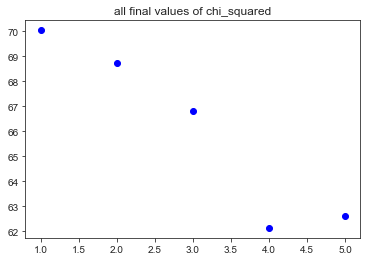

In [4]:
chi_squared = np.array(chi_squared)
indices_low_chi = np.where(chi_squared<5000)
final_par_low_chi = np.array(final_par)[indices_low_chi[0]]
energies_low_chi = np.array(energies)[indices_low_chi[0]]
rates_low_chi = np.array(rates)[indices_low_chi[0]]
low_chi = chi_squared[indices_low_chi[0]]
plt.plot(range(1,len(chi_squared)+1),chi_squared,'bo')
plt.title('all final values of chi_squared')

## Finding Median

In [5]:
median = np.zeros(len(final_par_low_chi[0]))
median_energies = np.zeros(len(energies_low_chi[0]))
median_rates = np.zeros(len(rates_low_chi[0]))

for i in range(len(final_par_low_chi[0])):
    median_temp = list()
    for j in range(len(final_par_low_chi)):
        median_temp.append(final_par_low_chi[j][i])
    median[i] = np.median(np.array(median_temp))
    
for i in range(len(energies_low_chi[0])):
    median_temp = list()
    for j in range(len(energies_low_chi)):
        median_temp.append(energies_low_chi[j][i])
    median_energies[i] = np.median(np.array(median_temp))
    
for i in range(len(rates_low_chi[0])):
    median_temp = list()
    for j in range(len(rates_low_chi)):
        median_temp.append(rates_low_chi[j][i])
    median_rates[i] = np.median(np.array(median_temp))
    
print len(final_par_low_chi)

5


## Matches

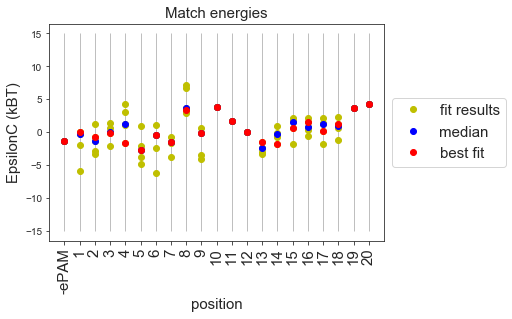

In [6]:
plt.figure()
for i in range(len(energies_low_chi)):
    plot1, = plt.plot(range(0,21),energies_low_chi[i][0:21],'yo',label='fit results')
    
plot2, = plt.plot(range(0,21),median_energies[0:21],'bo',label='median')
plot3, = plt.plot(range(0,21),energies[np.argmin(chi_squared)][0:21],'ro',label='best fit')
#plot4, = plt.plot(range(1,21),parameters[0:20],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('EpsilonC (kBT)',fontsize=15)
plt.title('Match energies',fontsize=15)
plt.vlines(range(0,21),-15,15,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['-ePAM'] + range(1,21),fontsize=15,rotation='vertical');

## Mismatches

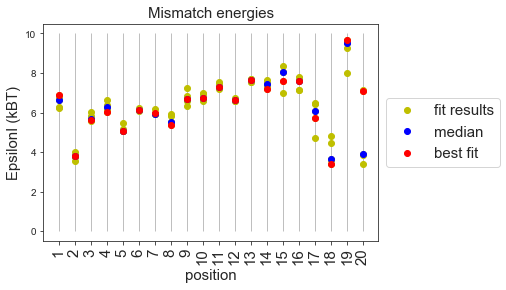

In [18]:
plt.figure()
for i in range(len(energies_low_chi)):
    plot1, = plt.plot(range(1,21),energies_low_chi[i][21:41],'yo',label='fit results')

plot2, = plt.plot(range(1,21),median_energies[21:41],'bo',label='median')
plot3, = plt.plot(range(1,21),energies[np.argmin(chi_squared)][21:41],'ro',label='best fit')
#plot4, = plt.plot(range(1,21),parameters[20:40],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('EpsilonI (kBT)',fontsize=15)
plt.title('Mismatch energies',fontsize=15)
plt.vlines(range(1,21),0,10,color='grey',linewidth=0.5);
plt.xticks(range(1,21),range(1,21),fontsize=15,rotation='vertical');

## Energy Landscape

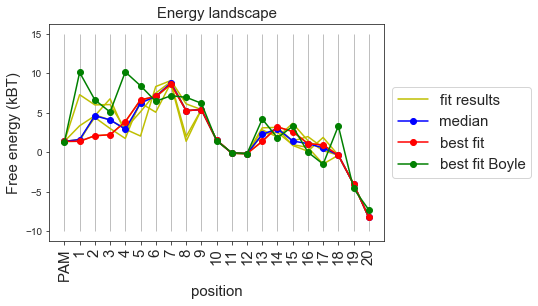

In [13]:
best_fit_boyle = np.loadtxt('best_fit_new.txt')
#best_fit_boyle = (best_fit_boyle[1:22]-best_fit_boyle[0])
best_fit_boyle = -np.cumsum(best_fit_boyle[0:21])
landscapes = np.zeros([len(energies_low_chi),21])

plt.figure()
for i in range(len(energies_low_chi)):
    #final_par_low_chi[i][5] -= 6.
    plot1, = plt.plot(range(0,21),-np.cumsum(energies_low_chi[i][0:21]),'y-',label='fit results')
    landscapes[i,:] = -np.cumsum(energies_low_chi[i][0:21])
    
medianls = np.median(landscapes, 0)
    
plot2, = plt.plot(range(0,21),medianls,'b-o', label='median')    
plot3, = plt.plot(range(0,21),-np.cumsum(energies[np.argmin(chi_squared)][0:21]),'r-o',label='best fit')
#plot4, = plt.plot(range(1,21),-np.cumsum(parameters[0:20]),'k-o',label='actual values')
plot5 = plt.plot(range(0,21),best_fit_boyle,'g-o',label='best fit Boyle')

plt.legend(handles=[plot1,plot2,plot3,plot5[0]],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('Free energy (kBT)',fontsize=15)
plt.title('Energy landscape',fontsize=15)
plt.vlines(range(0,21),-10,15,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['PAM'] + range(1,21),fontsize=15,rotation='vertical');
#plt.axis([0,21,-15,10])

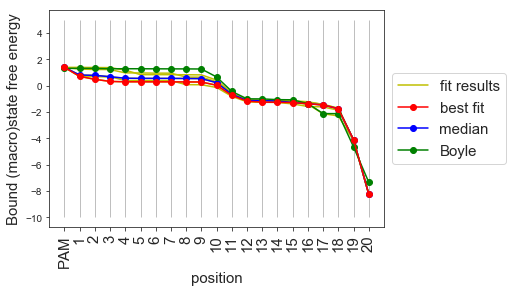

In [15]:
free_energy = np.zeros([len(landscapes),21])

for i in range(len(landscapes)):
    sumexp = np.exp(-landscapes[i][0]) #PAM energy
    free_energy[i][0] = -np.log(sumexp)
    for j in range(1,21):
        sumexp = sumexp + np.exp(-landscapes[i][j])
        free_energy[i][j] = -np.log(sumexp)
        

boyle = np.zeros(21)
sumexp = np.exp(-best_fit_boyle[0]) #PAM energy
boyle[0] = -np.log(sumexp)

for i in range(1,21):
    sumexp = sumexp + np.exp(-best_fit_boyle[i])
    boyle[i] = -np.log(sumexp)
 
for k in range(len(free_energy)):        
    plot1 = plt.plot(range(0,21),free_energy[k],'y-',label='fit results')
    
plot3 = plt.plot(range(0,21),np.median(free_energy,0),'b-o',label='median')
plot4 = plt.plot(range(0,21),boyle,'g-o',label='Boyle')
plot2 = plt.plot(range(0,21),free_energy[np.argmin(low_chi)],'r-o',label='best fit')

plt.ylabel('Bound (macro)state free energy',fontsize=15)
plt.legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0]],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.vlines(range(0,21),-10,5,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['PAM'] + range(1,21),fontsize=15,rotation='vertical');
#plt.axis([-1,21,-12,3])

## Forward rates

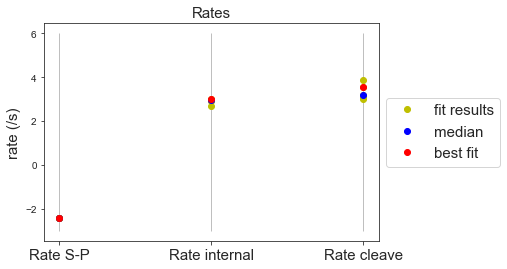

In [16]:
plt.figure()
for i in range(len(rates_low_chi)):
    plot1, = plt.plot(range(1,4),rates_low_chi[i],'yo',label='fit results')

plot2, = plt.plot(range(1,4),median_rates,'bo',label='median')
plot3, = plt.plot(range(1,4),rates[np.argmin(chi_squared)],'ro',label='best fit')
#plot4, = plt.plot(range(1,4),parameters[40:43],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.title('Rates',fontsize=15)
plt.ylabel('rate (/s)',fontsize=15)
plt.xticks(range(1,4),['Rate S-P', 'Rate internal', 'Rate cleave'],fontsize=15)
plt.vlines(range(1,4),-3,6,color='grey',linewidth=0.5);

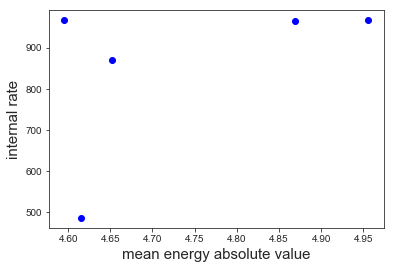

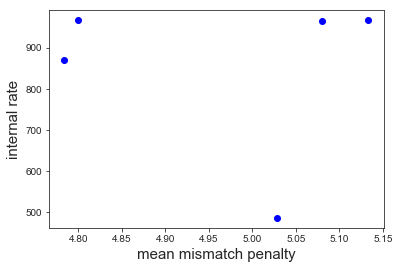

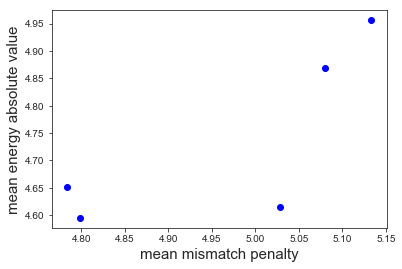

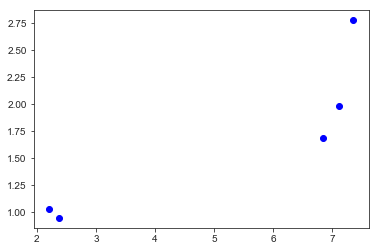

In [32]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plt.plot(np.mean(np.abs(final_par[i][0:21])),10**(final_par[i][-2]), marker = 'o', color = 'blue')
plt.ylabel('internal rate', fontsize=15)
plt.xlabel('mean energy absolute value', fontsize=15)

plt.figure()
for i in range(len(final_par_low_chi)):
    plt.plot(np.mean(np.abs(final_par[i][21:41])),10**(final_par[i][-2]), marker = 'o', color = 'blue')
plt.ylabel('internal rate', fontsize=15)
plt.xlabel('mean mismatch penalty', fontsize=15)

plt.figure()
for i in range(len(final_par_low_chi)):
    plt.plot(np.mean(np.abs(final_par[i][21:41])),np.mean(np.abs(final_par[i][0:21])), marker = 'o', color = 'blue')
plt.ylabel('mean energy absolute value', fontsize=15)
plt.xlabel('mean mismatch penalty', fontsize=15)

plt.figure()
for i in range(len(final_par_low_chi)):
    plt.plot(energies_low_chi[i][-1],rates_low_chi[i][-1],marker='o',color='blue')

## Correlation plots different fit results

Text(0.5,1,'Correlation coefficient: 0.9285\nLoglog Correlation coefficient: 0.8568')

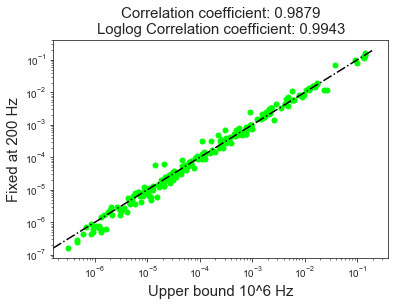

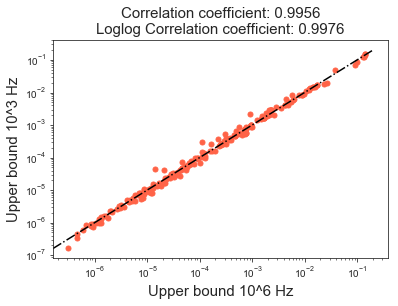

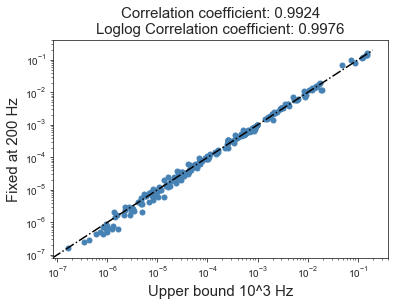

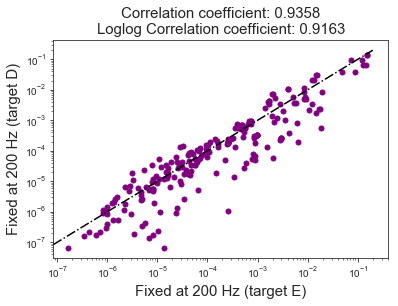

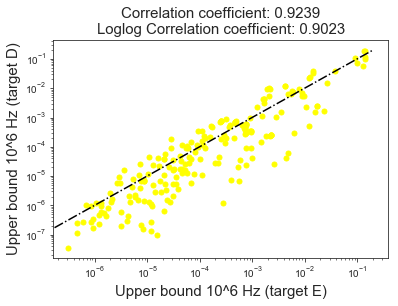

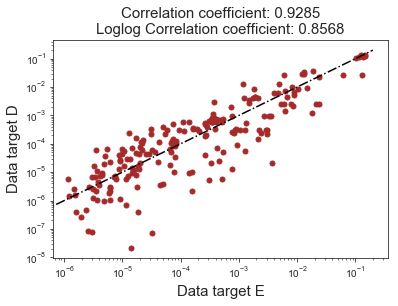

In [29]:
fitfile1 = '../fits_Stijn/13_3_2019/fit_13_3_2019_sim_13.txt' #free forward rate (10^6)
fitfile2 = '../fits_Stijn/19_3_2019/fit_19_3_2019_sim_25.txt' #fixed forward rate (200)
fitfile3 = '../fits_Stijn/14_3_2019/fit_14_3_2019_sim_23.txt' #constrained forward rate (10^3)
fitfile4 = '../fits_Stijn/21_3_2019/fit_21_3_2019_sim_12.txt' #fixed forward rate (200) (target D)
fitfile5 = '../fits_Stijn/23_3_2019/fit_23_3_2019_sim_12.txt' #free forward rate (target D)

modelID1 = 'Clv_Saturated_general_energies_v2'
modelID2 = 'Clv_Saturated_fixed_kf_general_energies_v2'
modelID3 = modelID1
modelID4 = modelID2
modelID5 = modelID1

data1 = pd.read_table(fitfile1,index_col=False)
final_par1 = data1.loc[len(data1)-1,'Parameter 1':'Parameter 42']
final_par_np1 = final_par1.values
chi1 = data1.loc[:,'Potential'].values
data2 = pd.read_table(fitfile2,index_col=False)
final_par2 = data2.loc[len(data2)-1,'Parameter 1':'Parameter 41']
final_par_np2 = final_par2.values
chi2 = data2.loc[:,'Potential'].values
data3 = pd.read_table(fitfile3,index_col=False)
final_par3 = data3.loc[len(data3)-1,'Parameter 1':'Parameter 42']
final_par_np3 = final_par3.values
chi3 = data3.loc[:,'Potential'].values
data4 = pd.read_table(fitfile4,index_col=False)
final_par4 = data4.loc[len(data4)-1,'Parameter 1':'Parameter 41']
final_par_np4 = final_par4.values
chi4 = data4.loc[:,'Potential'].values
data5 = pd.read_table(fitfile5,index_col=False)
final_par5 = data5.loc[len(data5)-1,'Parameter 1':'Parameter 42']
final_par_np5 = final_par5.values
chi5 = data5.loc[:,'Potential'].values

kclv1 = []
kclv2 = []
kclv3 = []
kclv4 = []
kclv5 = []

kclv1.append(clv.calc_clv_rate_fast(final_par_np1,modelID1,[]))
kclv2.append(clv.calc_clv_rate_fast(final_par_np2,modelID2,[]))
kclv3.append(clv.calc_clv_rate_fast(final_par_np3,modelID3,[]))
kclv4.append(clv.calc_clv_rate_fast(final_par_np4,modelID4,[]))
kclv5.append(clv.calc_clv_rate_fast(final_par_np5,modelID5,[]))

for pos in range(1,21):
    kclv1.append(clv.calc_clv_rate_fast(final_par_np1,modelID1,[pos]))
    kclv2.append(clv.calc_clv_rate_fast(final_par_np2,modelID2,[pos]))
    kclv3.append(clv.calc_clv_rate_fast(final_par_np3,modelID3,[pos]))
    kclv4.append(clv.calc_clv_rate_fast(final_par_np4,modelID4,[pos]))
    kclv5.append(clv.calc_clv_rate_fast(final_par_np5,modelID5,[pos]))
    
for pos1 in range(1,20):
    for pos2 in range(pos1+1,21):
        kclv1.append(clv.calc_clv_rate_fast(final_par_np1,modelID1,[pos1,pos2]))
        kclv2.append(clv.calc_clv_rate_fast(final_par_np2,modelID2,[pos1,pos2]))
        kclv3.append(clv.calc_clv_rate_fast(final_par_np3,modelID3,[pos1,pos2]))
        kclv4.append(clv.calc_clv_rate_fast(final_par_np4,modelID4,[pos1,pos2]))
        kclv5.append(clv.calc_clv_rate_fast(final_par_np5,modelID5,[pos1,pos2]))
        
plt.loglog(kclv1,kclv2,marker='o',markersize=5,color='lime',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^6 Hz',fontsize=15)
plt.ylabel('Fixed at 200 Hz',fontsize=15)
plt.title('Correlation coefficient: ' + str(np.round(np.corrcoef([kclv1,kclv2])[0][1],4)) + '\n'
         +'Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([np.log10(kclv1),np.log10(kclv2)])[0][1],4)), fontsize=15)

plt.figure()
plt.loglog(kclv1,kclv3,marker='o',markersize=5,color='tomato',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^6 Hz',fontsize=15)
plt.ylabel('Upper bound 10^3 Hz',fontsize=15)
plt.title('Correlation coefficient: ' + str(np.round(np.corrcoef([kclv1,kclv3])[0][1],4)) + '\n'
         +'Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([np.log10(kclv1),np.log10(kclv3)])[0][1],4)), fontsize=15)

plt.figure()
plt.loglog(kclv3,kclv2,marker='o',markersize=5,color='steelblue',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^3 Hz',fontsize=15)
plt.ylabel('Fixed at 200 Hz',fontsize=15)
plt.title('Correlation coefficient: ' + str(np.round(np.corrcoef([kclv3,kclv2])[0][1],4)) + '\n'
         +'Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([np.log10(kclv3),np.log10(kclv2)])[0][1],4)), fontsize=15)

plt.figure()
plt.loglog(kclv3,kclv4,marker='o',markersize=5,color='purple',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Fixed at 200 Hz (target E)',fontsize=15)
plt.ylabel('Fixed at 200 Hz (target D)',fontsize=15)
plt.title('Correlation coefficient: ' + str(np.round(np.corrcoef([kclv3,kclv4])[0][1],4)) + '\n'
         +'Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([np.log10(kclv3),np.log10(kclv4)])[0][1],4)), fontsize=15)

plt.figure()
plt.loglog(kclv1,kclv5,marker='o',markersize=5,color='yellow',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Upper bound 10^6 Hz (target E)',fontsize=15)
plt.ylabel('Upper bound 10^6 Hz (target D)',fontsize=15)
plt.title('Correlation coefficient: ' + str(np.round(np.corrcoef([kclv1,kclv5])[0][1],4)) + '\n'
         +'Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([np.log10(kclv1),np.log10(kclv5)])[0][1],4)), fontsize=15)


filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_dataD = '../data_nucleaseq_Finkelsteinlab/targetD/'
path_to_dataE = '../data_nucleaseq_Finkelsteinlab/targetE/'
xE, ydatamedianE, _ = processing.prepare_multiprocessing_nucleaseq(filename, path_to_dataE, True)
xD, ydatamedianD, _ = processing.prepare_multiprocessing_nucleaseq(filename, path_to_dataD, True)
E = np.zeros(len(ydatamedianE))
D = np.zeros(len(ydatamedianD))
for i in range(len(ydatamedianE)):
    E[i] = ydatamedianE[i][0]
    D[i] = ydatamedianD[i][0]
    
indices = np.where(D>10**-11)
D = D[indices[0]]
E = E[indices[0]]
plt.figure()
plt.loglog(E,D,marker='o',markersize=5,color='brown',linewidth=0.0)
plt.loglog([0,0.2],[0,0.2],'k-.')
plt.xlabel('Data target E',fontsize=15)
plt.ylabel('Data target D',fontsize=15)
plt.title('Correlation coefficient: ' + str(np.round(np.corrcoef([E,D])[0][1],4)) + '\n'
         +'Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([np.log10(E),np.log10(D)])[0][1],4)), fontsize=15)
#plt.axis([10**-7,1,10**-7,1])

## RDP and Chi^2

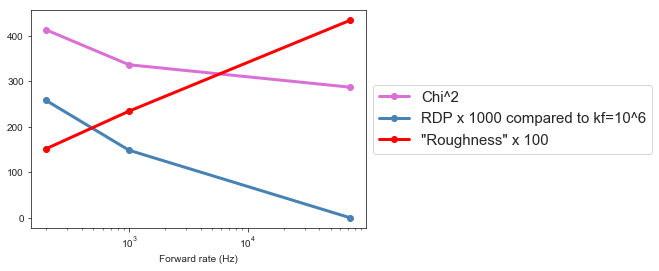

In [227]:
RDPtemp = np.zeros(len(kclv1))
for pos in range(len(RDPtemp)):
    RDPtemp[pos] = np.abs((kclv1[pos]-kclv2[pos])/kclv1[pos])
RDP2 = np.mean(RDPtemp)*1000

RDPtemp = np.zeros(len(kclv1))
for pos in range(len(RDPtemp)):
    RDPtemp[pos] = np.abs((kclv1[pos]-kclv3[pos])/kclv1[pos])
RDP3 = np.mean(RDPtemp)*1000

#Roughness
roughness1 = 0.0
roughness2 = 0.0
roughness3 = 0.0
roughness4 = 0.0
for i in range(3,18): #first and last two positions are excluded because of not well determined values
    roughness1 = roughness1 + np.abs(final_par_np1[i]-final_par_np1[i-1])
    roughness2 = roughness2 + np.abs(final_par_np2[i]-final_par_np2[i-1])
    roughness3 = roughness3 + np.abs(final_par_np3[i]-final_par_np3[i-1])
    roughness4 = roughness4 + np.abs(final_par_np4[i]-final_par_np4[i-1])
roughness1 = roughness1/19
roughness2 = roughness2/19
roughness3 = roughness3/19
roughness4 = roughness4/19

plt.semilogx([200,10**final_par_np3[40],10**final_par_np1[40]],[chi2[-1],chi3[-1],chi1[-1]],linewidth=3,color='orchid',marker='o')
plt.semilogx([200,10**final_par_np3[40],10**final_par_np1[40]],[RDP2,RDP3,0],marker='o',linewidth=3,color='steelblue')
plt.semilogx([200,10**final_par_np3[40],10**final_par_np1[40]],[100*roughness2,100*roughness3,100*roughness1],marker='o',linewidth=3,color='red')
plt.xlabel('Forward rate (Hz)')
plt.legend(['Chi^2','RDP x 1000 compared to kf=10^6','"Roughness" x 100'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
